# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Farhan Rangkuti - 1304202025

<b>Url presentasi</b>
https://youtu.be/hhGABxiHDuw

Fungsi yang dikerjakan

Tulis fungsi di sini
F2
- f(x) = Σ(i=1 to n) |xi| + Π(i=1 to n) |xi|

Range yang digunakan
- [-20, 20]

Algoritma yang digunakan
- Grey Wolf Algorithm
- RAO3



In [288]:
import random
import math
import copy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np
import imageio



**Schwefel 2.22 Function (F2)**

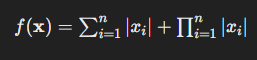

In [289]:
# Tuliskan fungsi di sini (untuk evaluasi fitness function)
def fitness_schwefel(position):
    abs_sum = sum(abs(xi) for xi in position)
    abs_prod = 1.0
    for xi in position:
        abs_prod *= abs(xi)
    return abs_sum + abs_prod

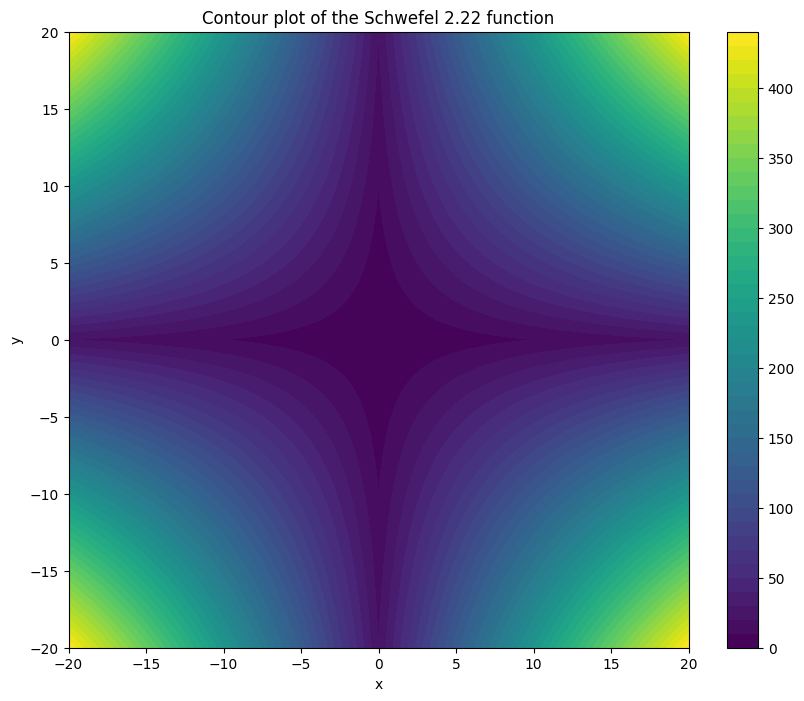

In [290]:
# Plot contour plot di sini berdasarkan range yang diberikan
# Define the range for the plot
x = np.linspace(-20, 20, 500)
y = np.linspace(-20, 20, 500)
X, Y = np.meshgrid(x, y)

Z = np.array([[fitness_schwefel([i, j]) for i, j in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

plt.figure(figsize=(10, 8))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Contour plot of the Schwefel 2.22 function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Latar Belakang algoritma 1
Grey Wolf Optimization (GWO) adalah sebuah algoritma optimasi metaheuristik yang diilhami oleh perilaku sosial dan teknik berburu dari serigala abu-abu (grey wolves). Algoritma ini dikembangkan oleh Mirjalili, dan Lewis pada tahun 2014.

GWO mengambil inspirasi dari struktur sosial dan teknik berburu serigala abu-abu, yang dikenal dengan kemampuan berorganisasi yang tinggi dalam berburu mangsa. Dalam kelompok serigala, terdapat hirarki yang jelas terdiri dari:

* Alpha (α): Pemimpin kelompok yang membuat keputusan utama.
* Beta (β): Asisten atau penasehat bagi alpha, dan bisa mengambil alih kepemimpinan saat diperlukan.
* Delta (δ): Peringkat ketiga dalam hierarki yang bertugas membantu beta dan alpha.
* Omega (ω): Serigala dengan peringkat terendah yang sering kali menjadi target agresi oleh serigala lain, tetapi berperan penting dalam menjaga kestabilan kelompok

Algoritma GWO mensimulasikan perilaku sosial dan teknik berburu ini melalui model matematis yang terdiri dari beberapa langkah:

* Inisialisasi: Menentukan populasi awal dari solusi (serigala) secara acak dalam ruang pencarian.
* Evaluasi Fitness: Menghitung nilai fitness dari setiap serigala dalam populasi.
* Mengupdate Posisi Serigala: Berdasarkan posisi alpha, beta, dan delta, posisi serigala lain diupdate dengan menggunakan persamaan matematika yang meniru perilaku mengintai, mengepung, dan menyerang mangsa.
* Kriteria Terminasi: Algoritma berjalan hingga mencapai kriteria terminasi tertentu, seperti jumlah iterasi maksimum atau konvergensi pada solusi terbaik.

In [304]:
# Wolf class
class Wolf:
    def __init__(self, fitness, dim, lb, ub, seed):
        self.rnd = random.Random(seed)
        self.position = [((ub - lb) * self.rnd.random() + lb) for _ in range(dim)]
        self.fitness = fitness(self.position)

# Grey Wolf Optimization (GWO)
def gwo(fitness, max_iter, n, dim, lb, ub):
    rnd = random.Random(0)
    population = [Wolf(fitness, dim, lb, ub, i) for i in range(n)]
    population = sorted(population, key=lambda temp: temp.fitness)
    alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[:3])

    positions_over_time = []
    #loop optimasi
    for Iter in range(max_iter):
        if Iter % 1 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " best fitness = %.7f" % alpha_wolf.fitness)

        a = 2 * (1 - Iter / max_iter)
        #update posisi serigala
        for i in range(n):
            A1, A2, A3 = a * (2 * rnd.random() - 1), a * (2 * rnd.random() - 1), a * (2 * rnd.random() - 1)
            C1, C2, C3 = 2 * rnd.random(), 2 * rnd.random(), 2 * rnd.random()
            X1, X2, X3, Xnew = [0.0] * dim, [0.0] * dim, [0.0] * dim, [0.0] * dim

            for j in range(dim):
                X1[j] = alpha_wolf.position[j] - A1 * abs(C1 * alpha_wolf.position[j] - population[i].position[j])
                X2[j] = beta_wolf.position[j] - A2 * abs(C2 * beta_wolf.position[j] - population[i].position[j])
                X3[j] = gamma_wolf.position[j] - A3 * abs(C3 * gamma_wolf.position[j] - population[i].position[j])
                Xnew[j] += X1[j] + X2[j] + X3[j]

            Xnew = [x / 3.0 for x in Xnew]
            fnew = fitness(Xnew)

            if fnew < population[i].fitness:
                population[i].position = Xnew
                population[i].fitness = fnew

        population = sorted(population, key=lambda temp: temp.fitness)
        alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[:3])
        positions_over_time.append([wolf.position for wolf in population])

        plt.figure()
        plt.scatter([wolf.position[0] for wolf in population], [wolf.position[1] for wolf in population], c='b', label='Wolves')
        plt.scatter(alpha_wolf.position[0], alpha_wolf.position[1], c='r', marker='x', label='Alpha Wolf')
        plt.scatter(beta_wolf.position[0], beta_wolf.position[1], c='g', marker='x', label='Beta Wolf')
        plt.scatter(gamma_wolf.position[0], gamma_wolf.position[1], c='y', marker='x', label='Gamma Wolf')
        plt.xlim(lb, ub)
        plt.ylim(lb, ub)
        plt.title(f"Iteration {Iter}")
        plt.legend()
        plt.savefig(f'iteration_{Iter:03d}.png')


    return alpha_wolf.position, positions_over_time




#### Latar Belakang algoritma 2
Algoritma RAO3 adalah salah satu algoritma optimasi yang dikembangkan oleh Prof. Dr. Hab. Ravipudi Venkata Rao. Beliau adalah seorang ilmuwan dan peneliti yang aktif dalam bidang optimasi dan rekayasa industri. Pada tahun 2016, Prof. Rao menerbitkan sebuah karya yang membahas algoritma optimasi baru yang dikenal sebagai algoritma RAO3.

Latar belakang dari algoritma RAO3 berkaitan erat dengan upaya untuk meningkatkan kinerja dan efisiensi proses optimasi. Algoritma ini memadukan berbagai pendekatan dan teknik optimasi untuk memberikan solusi yang lebih baik dalam menyelesaikan masalah-masalah kompleks yang sering ditemui dalam berbagai bidang seperti rekayasa, manufaktur, dan bisnis.

Salah satu keunggulan utama dari algoritma RAO3 adalah kemampuannya untuk menyelesaikan masalah-masalah optimasi dengan cepat dan efisien, terutama dalam konteks optimasi nonlinear, multi-dimensi, dan non-convex yang seringkali sulit untuk diselesaikan oleh metode optimasi tradisional. Algoritma ini juga memiliki kemampuan untuk menangani masalah-masalah yang melibatkan batasan-batasan kompleks dan tidak linear.

Dengan adanya algoritma RAO3, banyak aplikasi optimasi yang memerlukan solusi cepat dan akurat dapat diatasi dengan lebih baik. Ini membuat algoritma ini menjadi salah satu kontribusi penting dalam pengembangan teknik optimasi modern yang terus berkembang.

In [292]:
def rao3_algorithm(max_fes, dim, pop_size, lb, ub, runs=10):
    best_val = np.zeros(runs)
    for run in range(runs):
        max_iter = int(max_fes / pop_size)

        # inisialisasi posisi dan variabel
        positions = np.random.uniform(low=lb, high=ub, size=(pop_size, dim))
        best_pos = np.zeros(dim)
        worst_pos = np.zeros(dim)
        finval = np.zeros(max_iter)
        f1 = np.zeros(pop_size)
        f2 = np.zeros(pop_size)


        positions_history = []
        best_positions_history = []
        worst_positions_history = []

        for k in range(max_iter):
            best_score = float("inf")
            worst_score = float("-inf")

            #evaluasi fitness dan update best and worst pos
            for i in range(pop_size):
                positions[i] = np.clip(positions[i], lb, ub)
                f1[i] = fitness_schwefel(positions[i])
                if f1[i] < best_score:
                    best_score = f1[i].copy()
                    best_pos = positions[i].copy()
                if f1[i] > worst_score:
                    worst_score = f1[i].copy()
                    worst_pos = positions[i].copy()

            finval[k] = best_score
            positions_history.append(positions.copy())
            best_positions_history.append(best_pos.copy())
            worst_positions_history.append(worst_pos.copy())

            # Update posisi
            position_copy = positions.copy()
            for i in range(pop_size):
                r = np.random.randint(0, pop_size, size=1)[0]
                while r == i:
                    r = np.random.randint(0, pop_size, size=1)[0]

                if f1[i] < f1[r]:
                    for j in range(dim):
                        r1, r2 = random.random(), random.random()
                        positions[i, j] = position_copy[i, j] + r1 * (best_pos[j] - abs(worst_pos[j])) + r2 * (abs(position_copy[i, j]) - position_copy[r, j])
                else:
                    for j in range(dim):
                        r1, r2 = random.random(), random.random()
                        positions[i, j] = position_copy[i, j] + r1 * (best_pos[j] - abs(worst_pos[j])) + r2 * (abs(position_copy[r, j]) - positions[i, j])
                positions[i] = np.clip(positions[i], lb, ub)

            # pilih individu berdasarkan fitness
            f2 = np.array([fitness_schwefel(pos) for pos in positions])
            for i in range(pop_size):
                if f1[i] < f2[i]:
                    positions[i] = position_copy[i]

        best_score = np.amin(finval)
        print(f"The best solution for run {run+1} is: {best_score}")
        best_val[run] = best_score


        fig, ax = plt.subplots()
        ax.set_xlim(lb[0], ub[0])
        ax.set_ylim(lb[1], ub[1])
        scatter = ax.scatter(positions[:, 0], positions[:, 1])

        def update(frame):
            ax.clear()
            ax.set_xlim(lb[0], ub[0])
            ax.set_ylim(lb[1], ub[1])
            scatter = ax.scatter(positions_history[frame][:, 0], positions_history[frame][:, 1])
            ax.scatter(best_positions_history[frame][0], best_positions_history[frame][1], color='red', marker='x', label='Best Position')
            ax.scatter(worst_positions_history[frame][0], worst_positions_history[frame][1], color='green', marker='x', label='Worst Position')
            ax.legend()
            return scatter,

        ani = animation.FuncAnimation(fig, update, frames=max_iter, blit=True)
        plt.title(f"Run {run+1}")
        plt.savefig(f'run_{run:03d}.png')

    print(f"Best solution {np.min(best_val)}")
    print(f"Worst solution {np.max(best_val)}")
    print(f"Mean {np.mean(best_val)}")

    return best_val

#### Running algortima 1
* Dimension = 3, merupakan percobaan saja dikarenakan fungsi yang digunakan bisa dalam banyak dimensi.
* num_particles = 50, merupakan percobaan saja, karena hasil yang sudah optimal parameter selanjutnya tidak dicoba
* max_iter = 50, merupakan parameter yang optimum. Lebih dari itu tidak akan merubah secara signifikan.



Begin grey wolf optimization on Schwefel 2.22 function

Iter = 2 best fitness = 0.9356361
Iter = 3 best fitness = 0.8231619
Iter = 4 best fitness = 0.4978366
Iter = 5 best fitness = 0.2235535
Iter = 6 best fitness = 0.0817458
Iter = 7 best fitness = 0.0603709
Iter = 8 best fitness = 0.0305437
Iter = 9 best fitness = 0.0171995
Iter = 10 best fitness = 0.0099370
Iter = 11 best fitness = 0.0058955
Iter = 12 best fitness = 0.0028029
Iter = 13 best fitness = 0.0015397
Iter = 14 best fitness = 0.0007954
Iter = 15 best fitness = 0.0003871
Iter = 16 best fitness = 0.0002078
Iter = 17 best fitness = 0.0000343
Iter = 18 best fitness = 0.0000176
Iter = 19 best fitness = 0.0000061
Iter = 20 best fitness = 0.0000042


<ipython-input-291-8c4432b2f6dc>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Iter = 21 best fitness = 0.0000026
Iter = 22 best fitness = 0.0000019
Iter = 23 best fitness = 0.0000011
Iter = 24 best fitness = 0.0000009
Iter = 25 best fitness = 0.0000006
Iter = 26 best fitness = 0.0000003
Iter = 27 best fitness = 0.0000002
Iter = 28 best fitness = 0.0000001
Iter = 29 best fitness = 0.0000001
Iter = 30 best fitness = 0.0000001
Iter = 31 best fitness = 0.0000000
Iter = 32 best fitness = 0.0000000
Iter = 33 best fitness = 0.0000000
Iter = 34 best fitness = 0.0000000
Iter = 35 best fitness = 0.0000000
Iter = 36 best fitness = 0.0000000
Iter = 37 best fitness = 0.0000000
Iter = 38 best fitness = 0.0000000
Iter = 39 best fitness = 0.0000000
Iter = 40 best fitness = 0.0000000
Iter = 41 best fitness = 0.0000000
Iter = 42 best fitness = 0.0000000
Iter = 43 best fitness = 0.0000000
Iter = 44 best fitness = 0.0000000
Iter = 45 best fitness = 0.0000000
Iter = 46 best fitness = 0.0000000
Iter = 47 best fitness = 0.0000000
Iter = 48 best fitness = 0.0000000
Iter = 49 best fitne

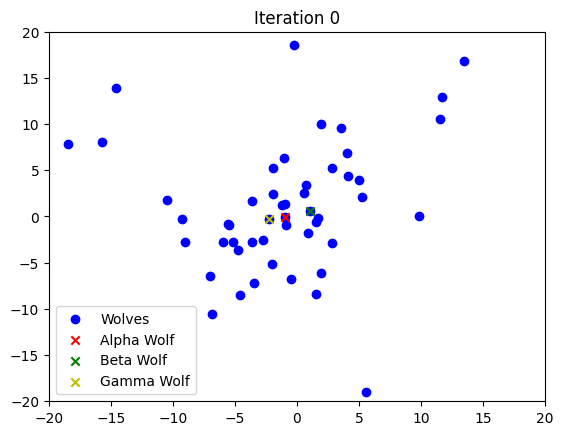

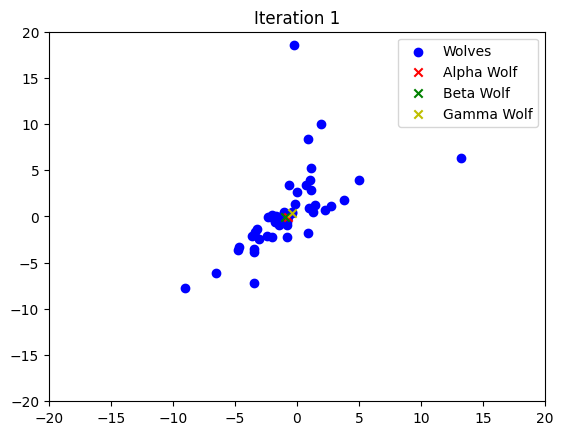

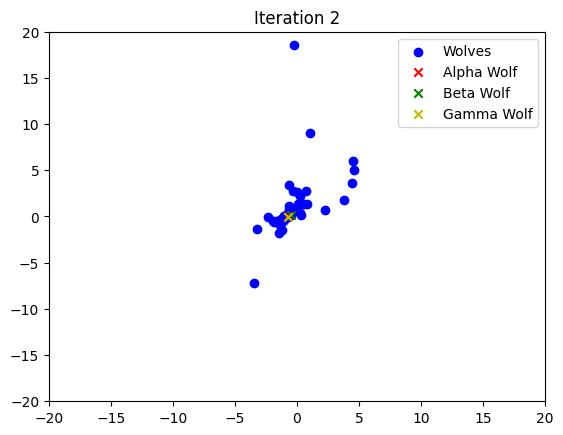

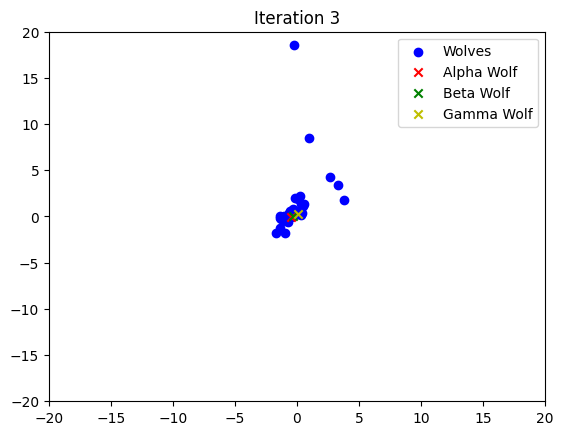

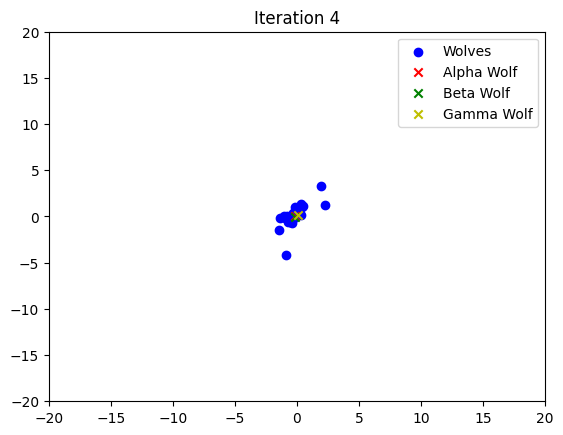

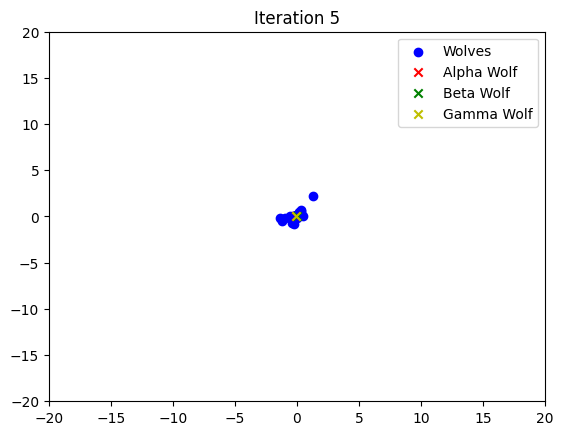

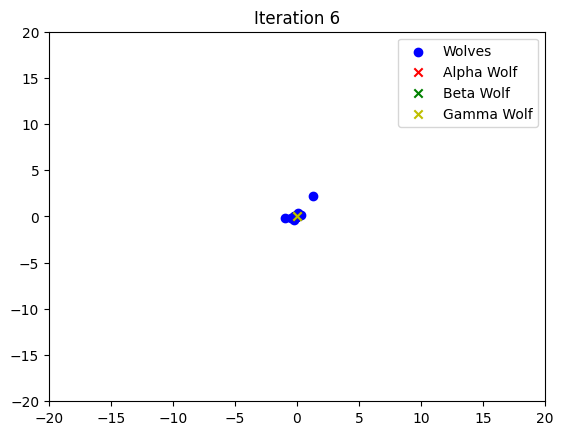

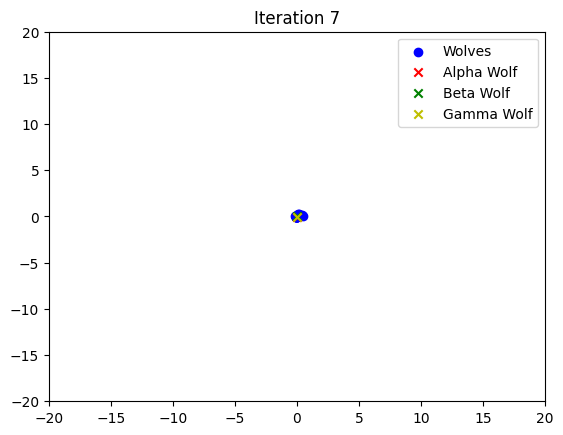

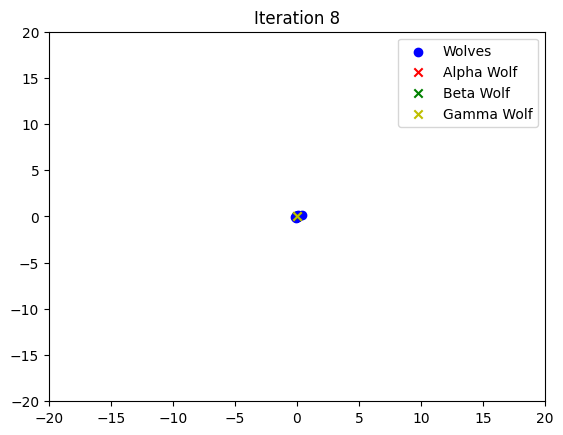

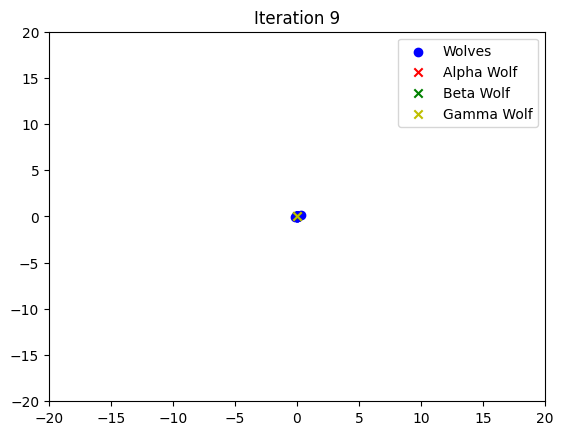

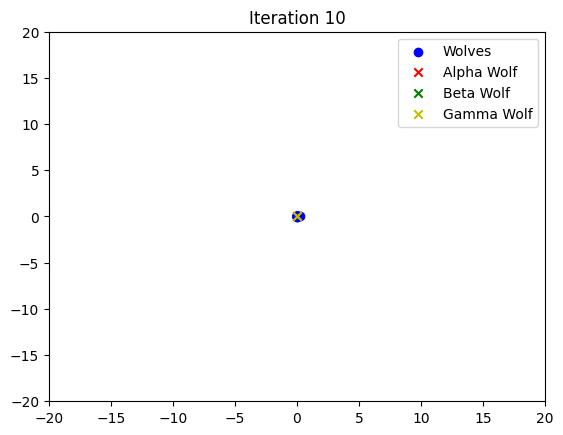

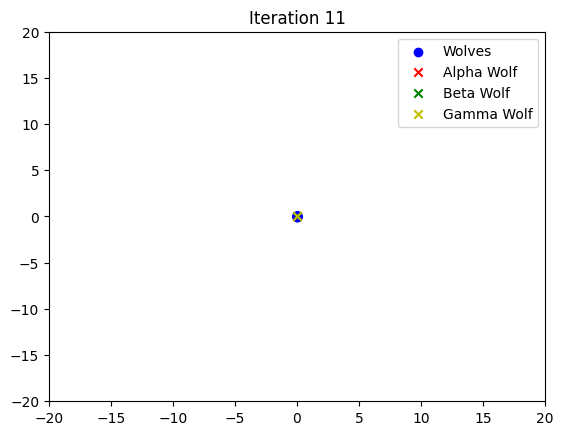

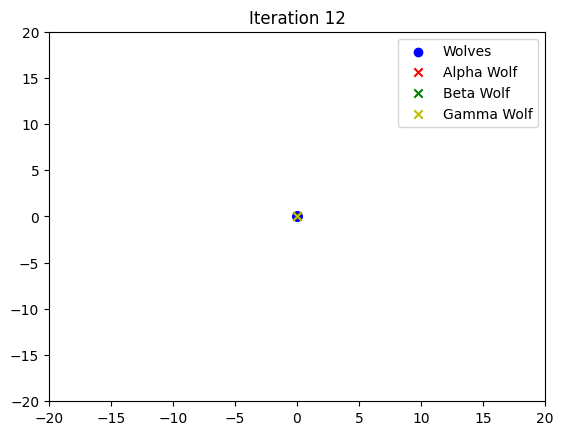

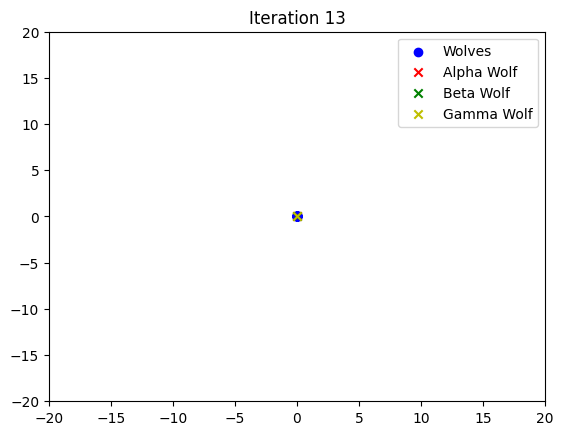

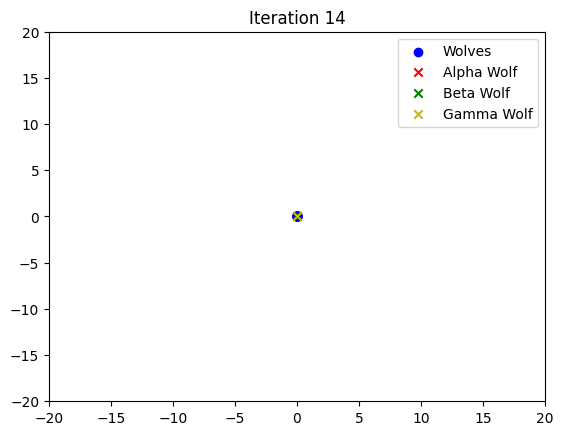

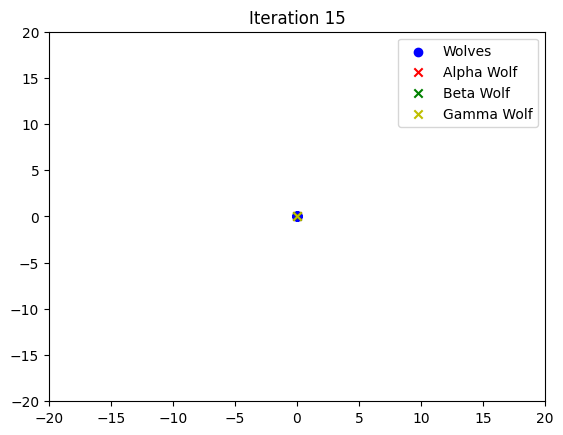

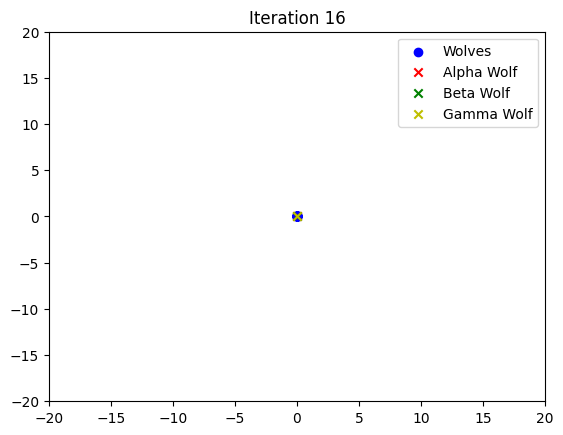

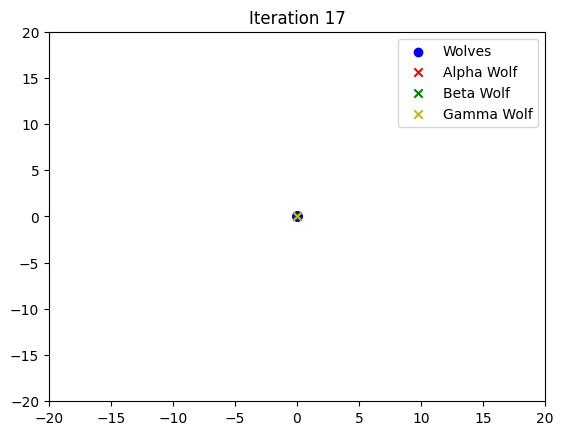

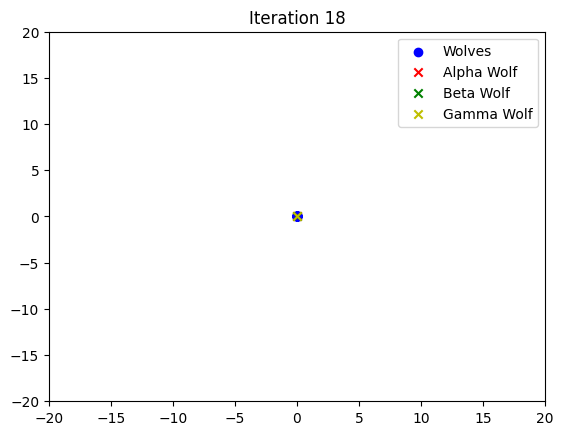

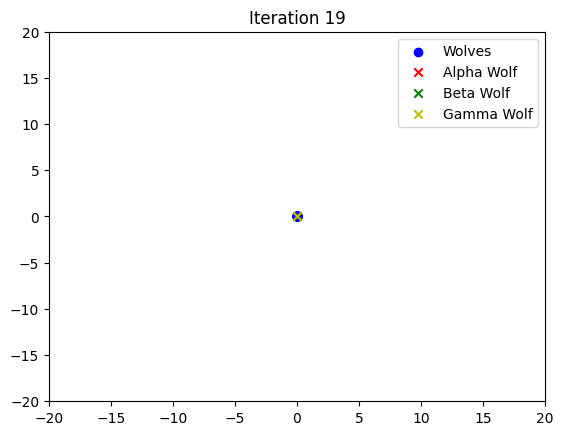

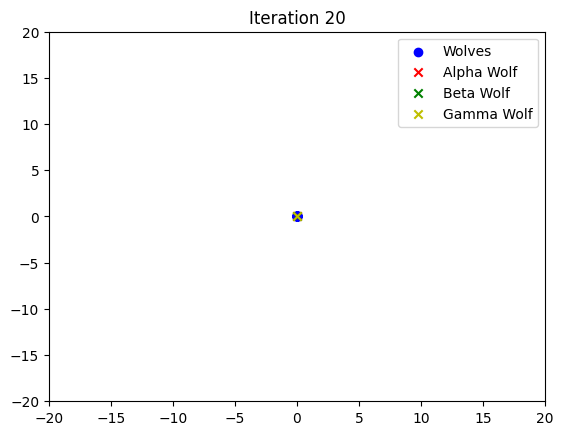

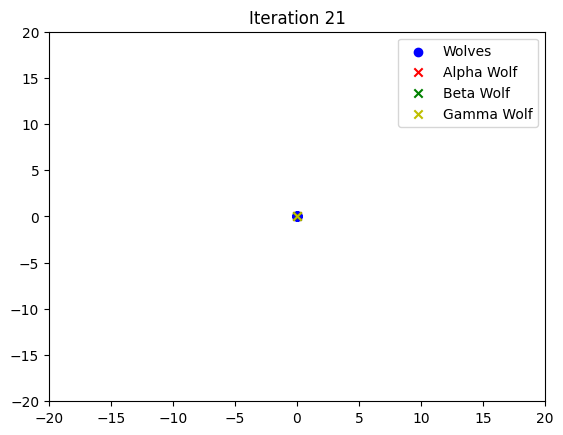

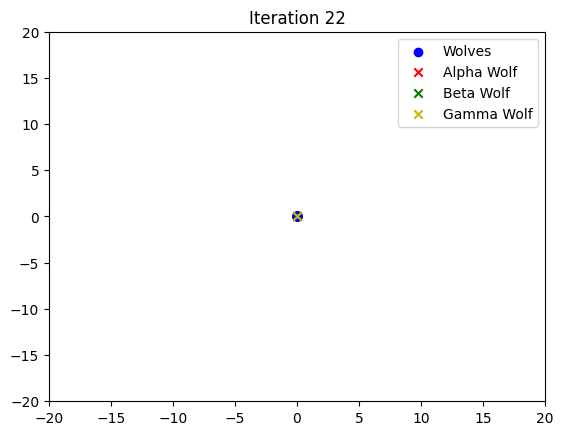

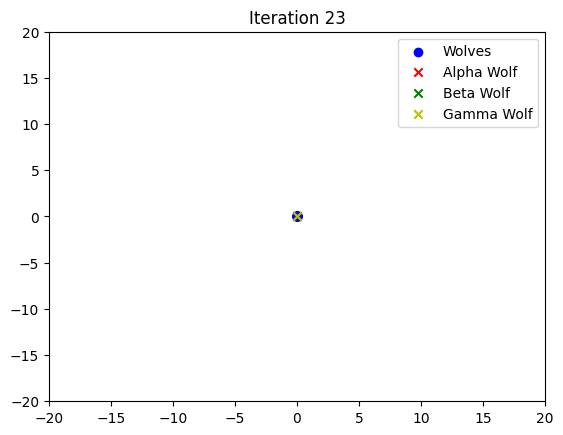

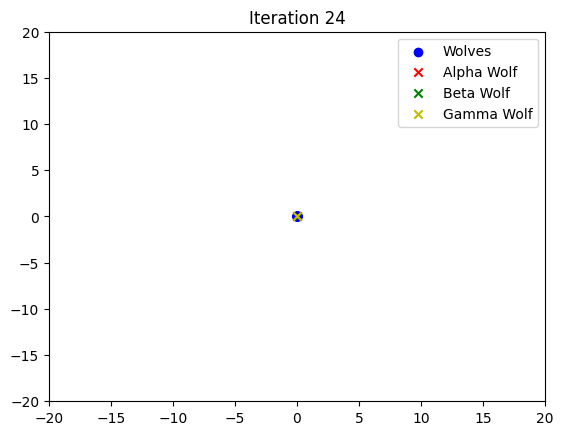

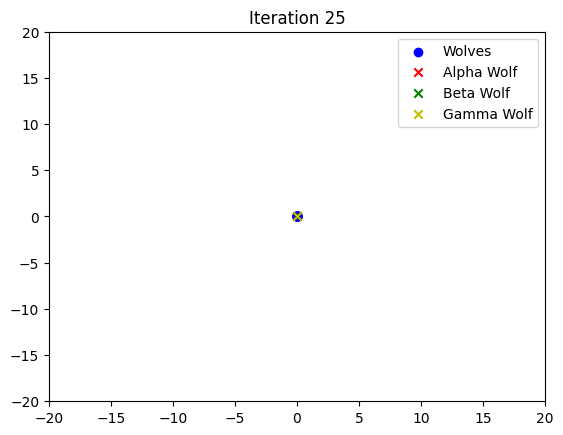

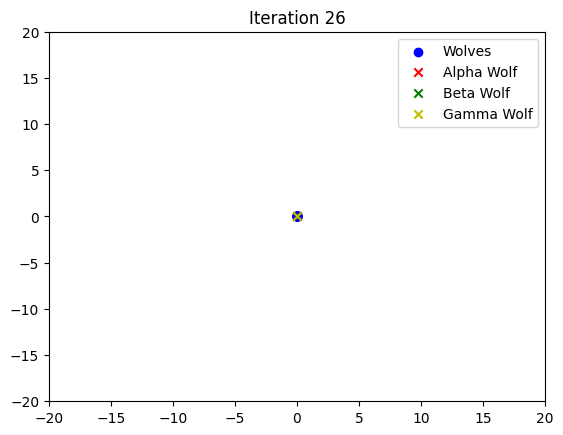

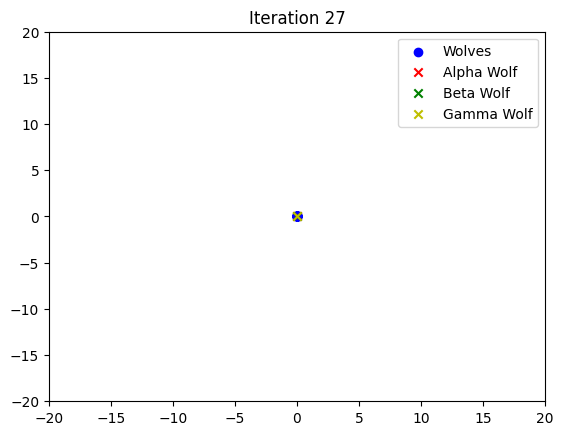

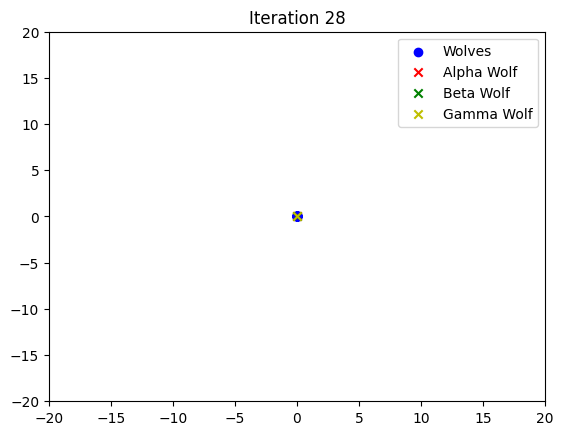

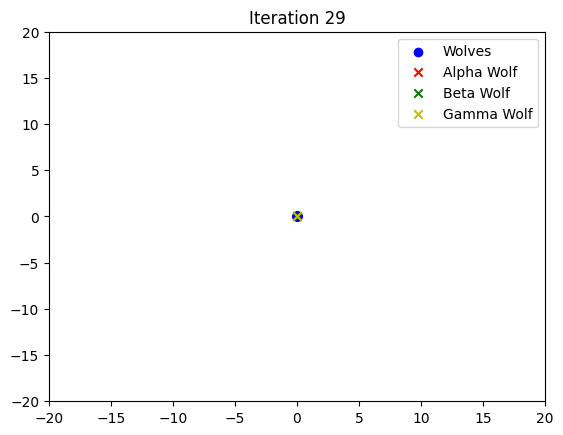

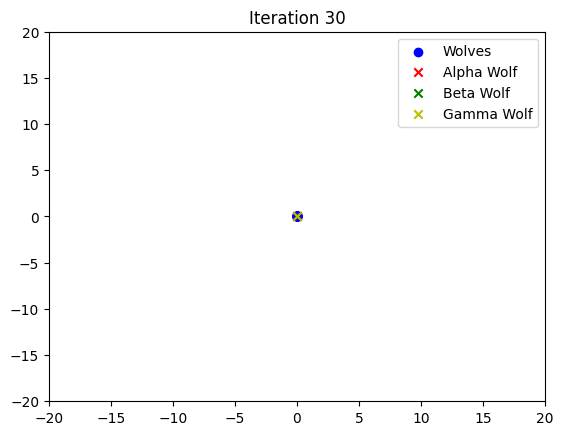

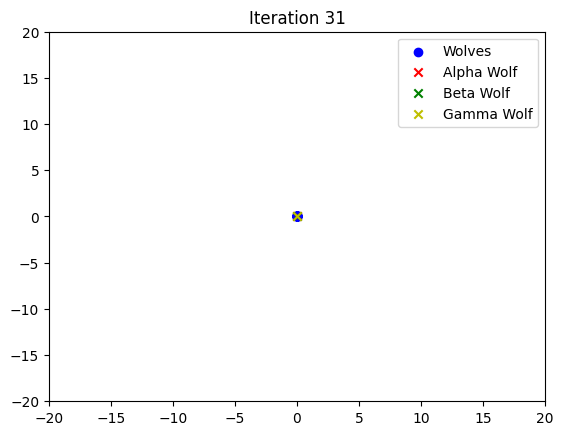

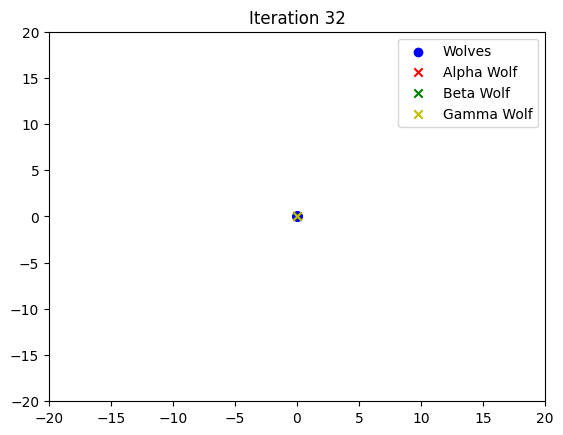

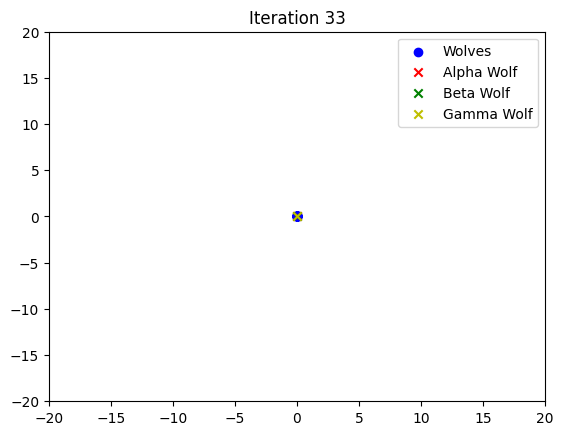

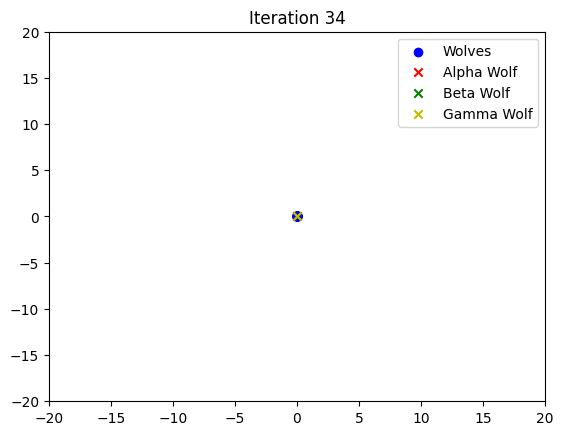

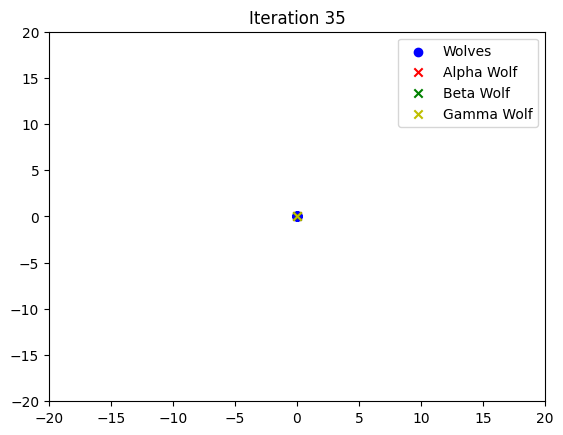

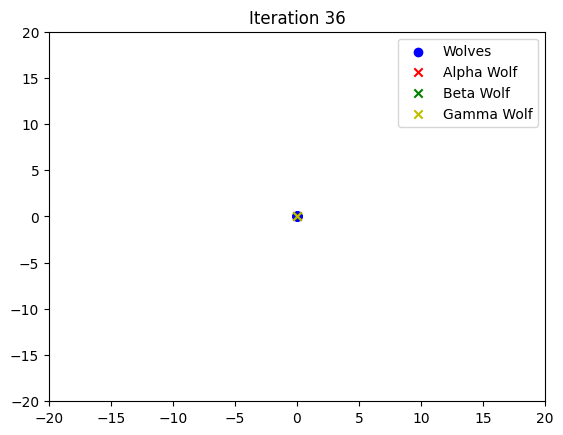

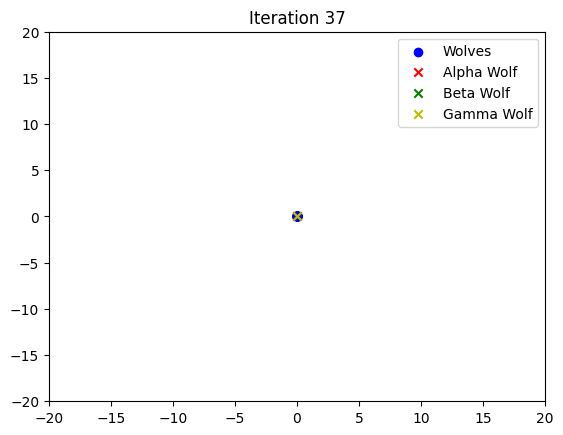

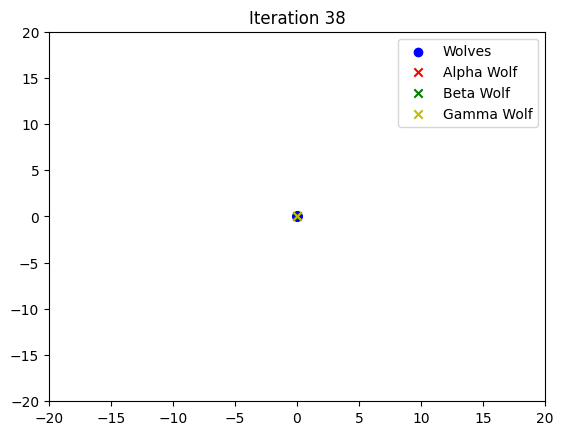

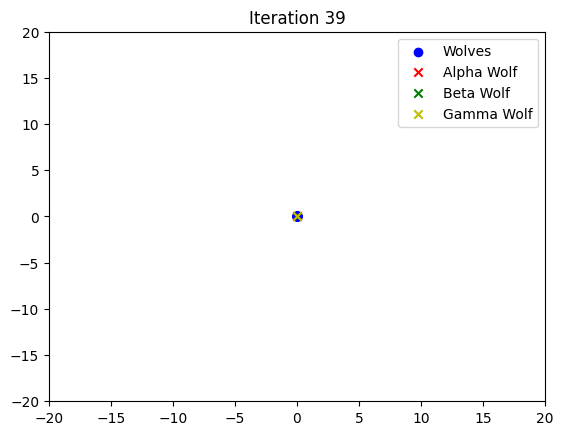

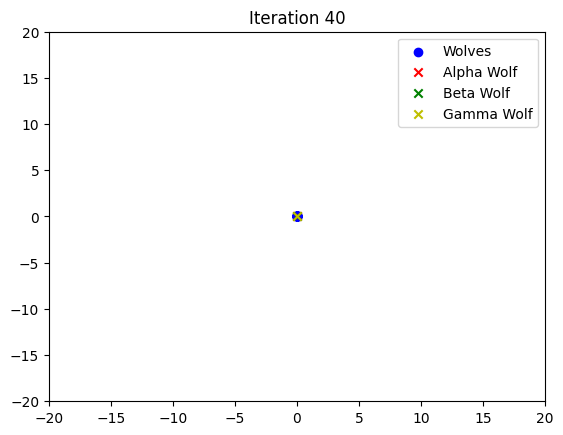

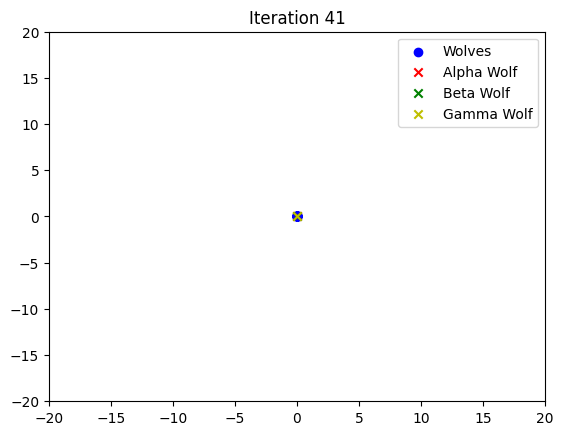

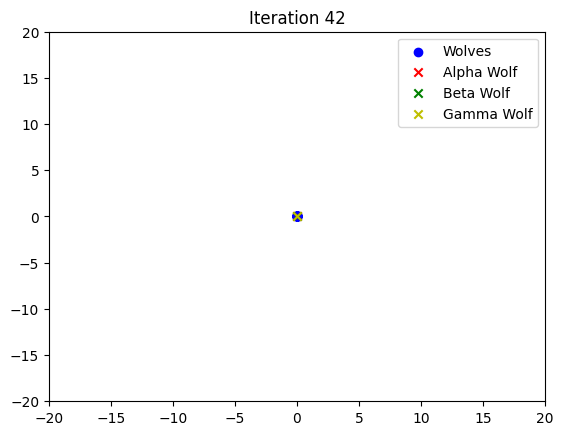

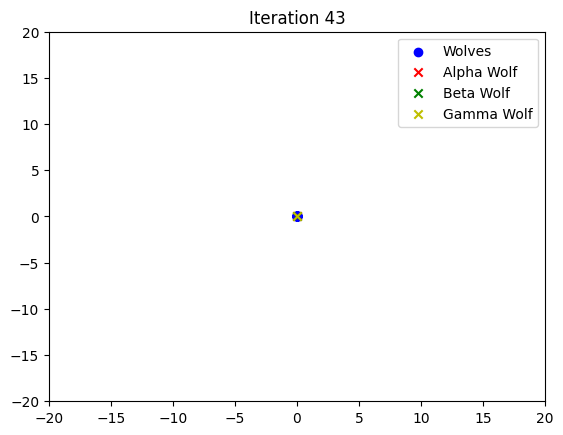

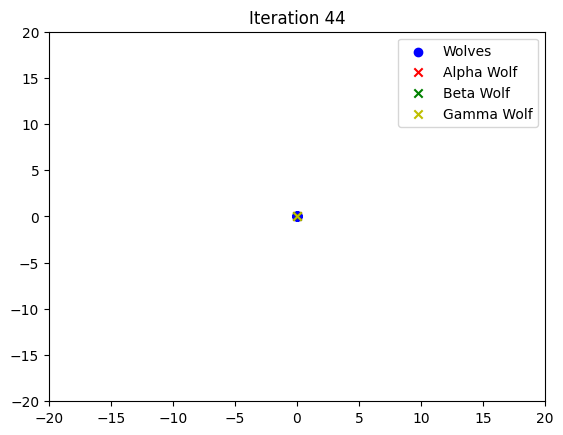

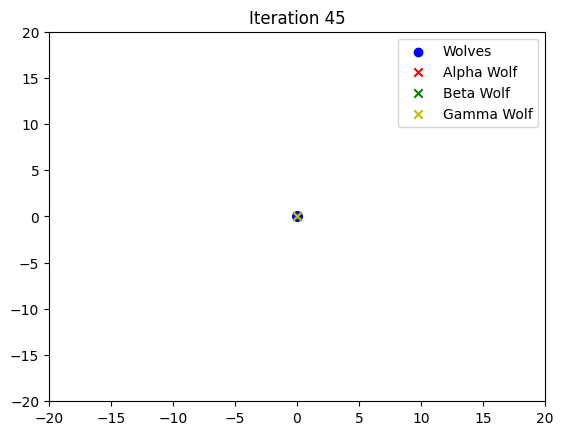

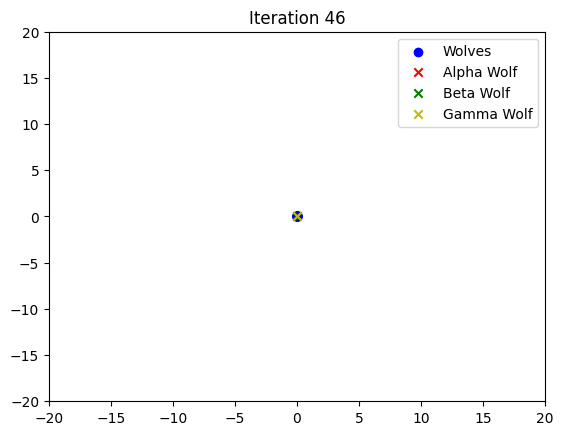

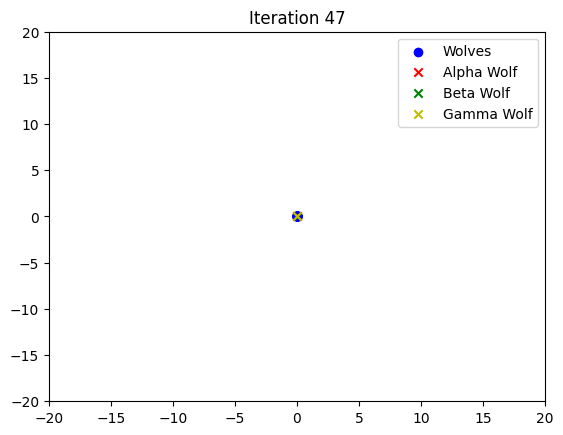

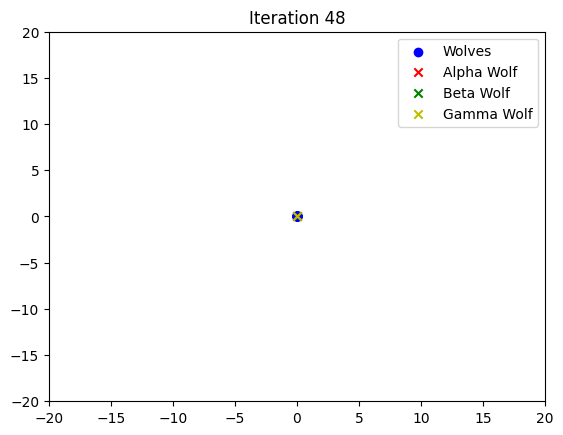

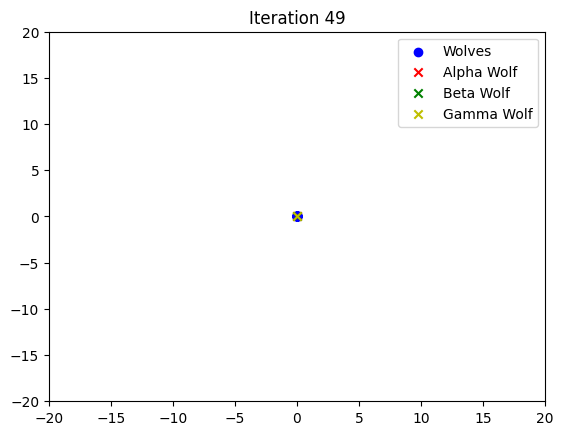

In [293]:
# Run algoritma 1
print("\nBegin grey wolf optimization on Schwefel 2.22 function\n")
dim = 3
fitness = fitness_schwefel
num_particles = 50
max_iter = 50

best_position, positions_over_time = gwo(fitness, max_iter, num_particles, dim, -20.0, 20.0)

print("\nGWO completed")
print("\nBest solution found:")
print(["%.6f" % best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)




In [294]:
# Plot hasil running algoritma 1 secara interaktif

frames = []
for Iter in range(max_iter):
  frames.append(imageio.imread(f'iteration_{Iter:03d}.png'))

imageio.mimsave('wolf_positions.gif', frames, duration=0.5)



<ipython-input-294-7ea9eb0e6ff4>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'iteration_{Iter:03d}.png'))


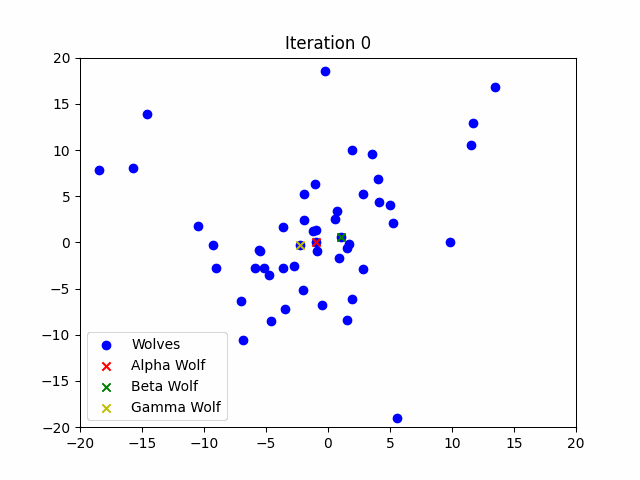

In [306]:
from IPython.display import Image

image_path = "/content/wolf_positions.gif"

Image(filename=image_path)

#### Running algortima 2
* max_fes = 10000, merupakan percobaan saja, hasil sudah optimal.
* dim = 3, merupakan percobaan saja dikarenakan fungsi yang digunakan bisa dalam banyak dimensi.
lb, ub = -20, 20, merupakan range yang sudah ditentukan
pop_size = 100, merupakan parameter yang optimum, <100 atau >100 dapat mengurangi performa algoritma
runs = 10, merupakan percobaan saja, hasil sudah optimal.

The best solution for run 1 is: 0.0005036988881105745
The best solution for run 2 is: 0.0009771994923467569
The best solution for run 3 is: 0.00041592416420853384
The best solution for run 4 is: 0.0001987310571167291
The best solution for run 5 is: 0.0005496040049754462
The best solution for run 6 is: 0.00018313326382321868
The best solution for run 7 is: 0.00048281433263774306
The best solution for run 8 is: 0.001080831776274183
The best solution for run 9 is: 0.002047590423611263
The best solution for run 10 is: 0.0001696352094988451
Best solution 0.0001696352094988451
Worst solution 0.002047590423611263
Mean 0.0006609162612603292


array([0.0005037 , 0.0009772 , 0.00041592, 0.00019873, 0.0005496 ,
       0.00018313, 0.00048281, 0.00108083, 0.00204759, 0.00016964])

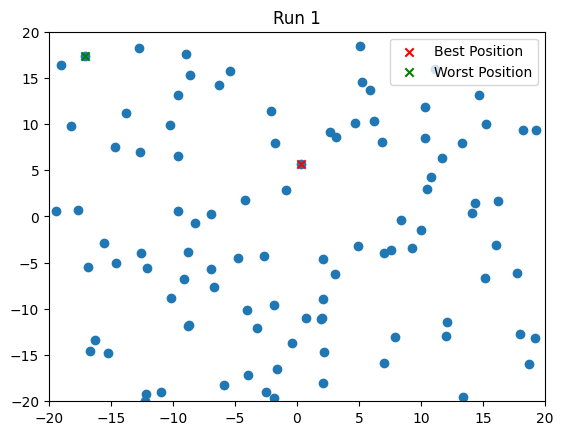

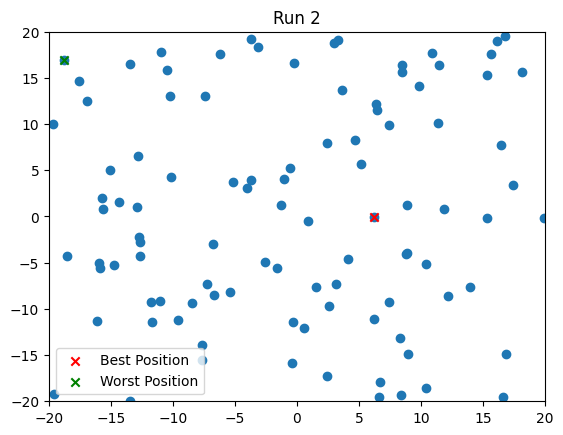

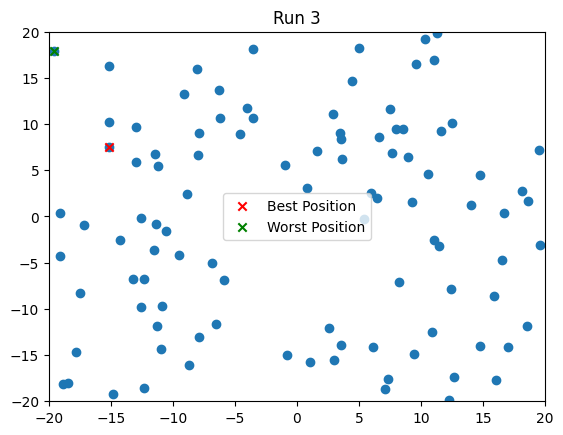

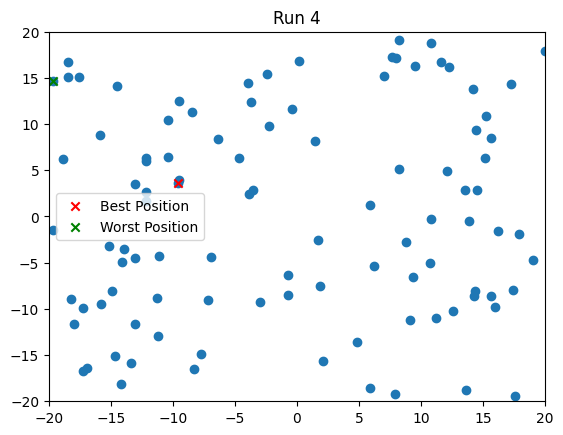

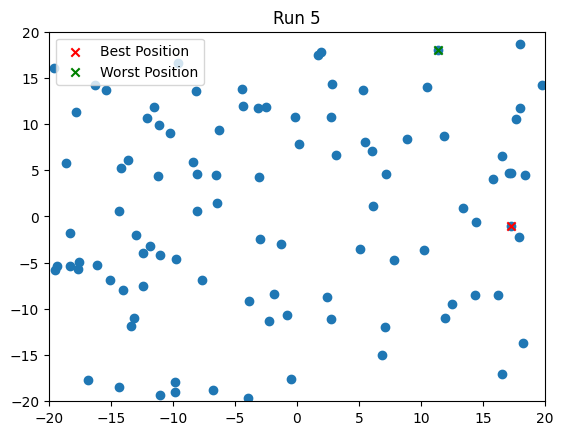

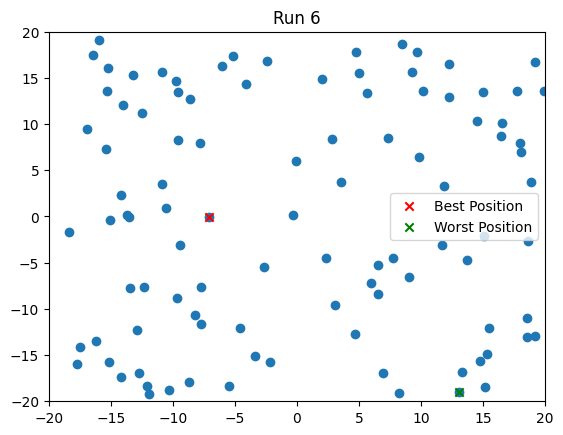

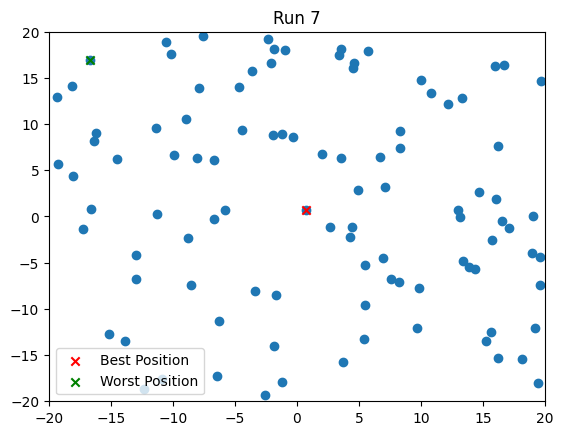

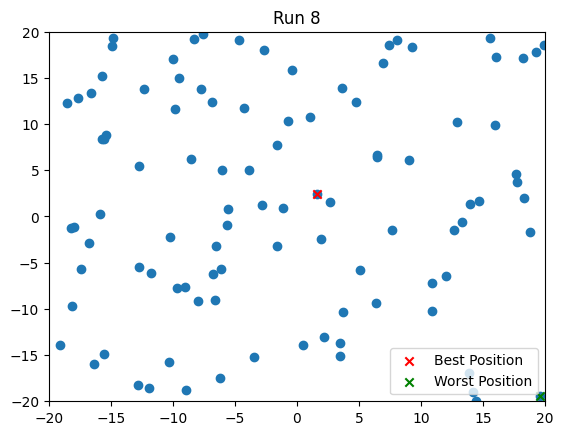

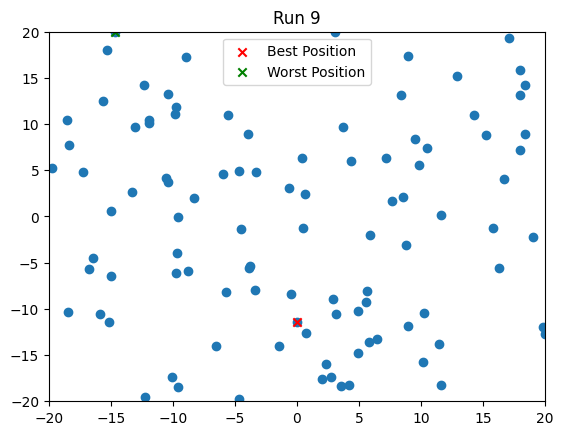

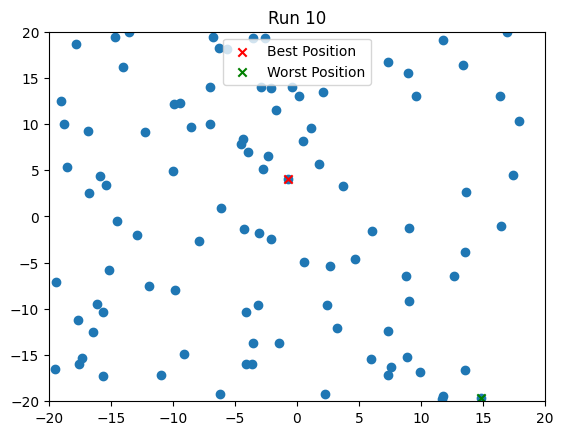

In [303]:
# Run algoritma 2
max_fes = 10000
dim = 3
pop_size = 100
lb = -20*np.ones(dim)
ub = 20*np.ones(dim)
rao3_algorithm(max_fes, dim, pop_size, lb, ub, runs=10)

In [297]:
# Plot hasil running algoritma 2 secara interaktif
frames2 = []
for Iter in range(10):
  frames2.append(imageio.imread(f'run_{Iter:03d}.png'))

imageio.mimsave('runs.gif', frames2, duration=0.5)


<ipython-input-297-e17ae347ef61>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames2.append(imageio.imread(f'run_{Iter:03d}.png'))


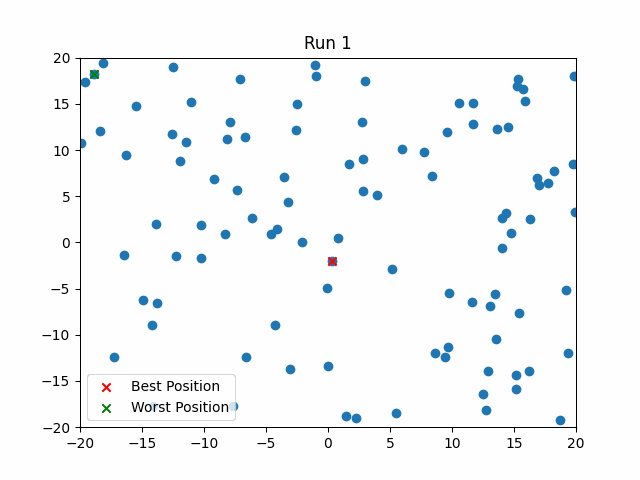

In [307]:
image_paths = "/content/runs.gif"

Image(filename=image_paths)

#### Hasil dan Analisis
Hasil best solution GWO:= 0.000000
Hasil best solution RAO3:= 0.000169635209498845

Dengan menggunakan 50 iterasi dan 50 jumlah wolf/individu, GWO memiliki performa yang lebih tinggi dan stabil. Performa GWO meningkat seiring dengan iterasi, hingga mencapai konvergensi. Sedangkan RAO3 dengan menggunakan jumlah maksimal evaluasi fungsi 10000, populasi yang lebih banyak yaitu 100, dengan iterasi yang lebih sedikit yaitu 10, memiliki performa yang lebih buruk daripada GWO. Performa RAO3 cenderung acak dibandingkan performa GWO.

#### Kesimpulan
Berdasarkan hasil dan analisis yang diberikan, dapat disimpulkan bahwa algoritma Grey Wolf Optimizer (GWO) memiliki performa yang lebih tinggi dan stabil dibandingkan dengan algoritma Random Acceleration Optimization 3 (RAO3) dalam kasus yang disebutkan. Beberapa poin penting yang bisa diambil dari analisis ini adalah:

Performa dan Stabilitas: GWO memberikan hasil terbaik dengan nilai best solution yang lebih rendah (0.000000) dan stabil dibandingkan dengan RAO3 yang memiliki best solution lebih tinggi (0.000169). Hal ini menunjukkan bahwa GWO lebih efektif dalam menemukan solusi optimal.

Iterasi dan Populasi:Dengan populasi yang lebih kecil (50 wolf/individu) daripada populasi RAO (100 individu), GWO mampu mencapai performa yang lebih baik. Ini menunjukkan bahwa strategi pengaturan populasi dalam GWO lebih efisien dalam mengoptimalkan solusi.

Konvergensi dan Keacakan: GWO menunjukkan peningkatan performa seiring dengan iterasi dan mencapai konvergensi, sementara RAO3 cenderung memberikan hasil yang lebih acak dan tidak stabil meskipun menggunakan populasi yang lebih besar (100 individu).

Kesimpulannya, GWO adalah pilihan yang lebih baik dalam konteks yang disebutkan karena memiliki performa yang lebih baik, stabilitas yang tinggi, dan mampu mencapai konvergensi dengan efisien meskipun menggunakan populasi yang lebih kecil.